In [50]:
import numpy as np
import matplotlib.pyplot as plt
class RandomNeuralNetwork():
    """
    Random Neural Network
    """
    def __init__(self, X, y, eta=0.01, num_epochs=100, batch_size=32):
        self.X = X
        self.y = y
        self.w = np.random.randn(X.shape[1])  # vector of size equal to number of features
        self.b = np.random.randn()  # scalar bias term
        self.eta = eta  # learning rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.losses = []

    def compute_loss(self, y_true, y_pred) -> float:
      """
      Mean Squared Error
      """

      return np.mean((y_true - y_pred)**2)  # MSE

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Parameters:
          X: Numpy Array of Features
        Returns:
          prediction: Numpy Array that results from the dot product of X and W, then adding b
        """
        return np.dot(X, self.w) + self.b

    def train(self):
        num_samples = self.X.shape[0]

        for epoch in range(self.num_epochs):
            # Random shuffle
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X = self.X[indices]
            y = self.y[indices]

            epoch_loss = 0

            for start in range(0, num_samples, self.batch_size):
                end = min(start + self.batch_size, num_samples)
                X_batch = X[start:end]
                y_batch = y[start:end]

                # Forward pass
                y_pred = self.predict(X_batch)

                # Compute gradients
                error = y_pred - y_batch # L
                w_grad = np.dot(X_batch.T, error) / (end - start) # del w wrt L
                b_grad = np.mean(error) # del b wrt L

                # Update Step
                self.w -= self.eta * w_grad
                self.b -= self.eta * b_grad

                # Accumulate batch loss
                epoch_loss += self.compute_loss(y_batch, y_pred) * (end - start)

            # Compute average loss for the epoch
            epoch_loss /= num_samples
            self.losses.append(epoch_loss)

            print(f"Epoch: {epoch+1}, Loss: {epoch_loss:.6f}")

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        test_loss = self.compute_loss(y_test, y_pred)
        return test_loss

    def plot_loss(self):
        """
        Plot the loss over epochs
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.losses) + 1), self.losses)
        plt.title('Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()

    def get_params(self):
        return {'weights': self.w, 'bias': self.b}


In [57]:
# random vars for x and y

num_samples = 100 #'rows' of the dataset
num_features = 2 # 'cols' of the dataset
X = np.random.randn(num_samples, num_features)
Y = np.random.randn(num_samples)
print(X)
print (X.shape)
print(Y)
print (Y.shape)

[[ 1.12962872e+00  1.24588466e+00]
 [ 1.19212615e+00 -4.30966844e-01]
 [ 1.62344236e-01  1.13601491e+00]
 [-1.20040313e+00 -1.86443986e-01]
 [ 3.08305214e-02  1.53245232e+00]
 [ 3.17217386e-01  2.08679173e-02]
 [ 7.23130957e-01 -7.22849731e-01]
 [-1.90314892e+00 -1.41251620e+00]
 [ 3.66560303e-01 -7.02652235e-01]
 [ 4.86548332e-01  1.26997589e+00]
 [-1.12612614e+00 -2.17879067e+00]
 [-9.38837388e-01 -2.08166785e+00]
 [-1.76056364e-01  2.23461833e+00]
 [ 9.04542757e-02  1.87392729e+00]
 [ 7.10068086e-01 -1.62864907e-02]
 [-8.60754978e-01 -6.80885624e-02]
 [ 6.90117363e-02 -2.39394943e-01]
 [-8.93772064e-01  1.25863546e+00]
 [ 1.80794118e-01 -1.25110656e+00]
 [ 3.95929850e-01 -3.54231756e-03]
 [ 9.89091242e-01  2.96876070e-01]
 [ 1.39550964e+00  1.91373593e+00]
 [ 9.82344613e-02  1.37054343e+00]
 [-4.62656504e-01  3.27385121e-01]
 [ 9.54112707e-01  3.62917349e-01]
 [ 6.37024557e-01 -1.55311193e-01]
 [ 4.18848520e-01 -1.25024591e+00]
 [ 4.82136269e-01 -3.72963245e-01]
 [ 3.44156603e-01  1

In [65]:
# testing NN on data generated above
model = RandomNeuralNetwork(X = X, y = Y, num_epochs = 100)
model_res = model.train()


Epoch: 1, Loss: 2.056703
Epoch: 2, Loss: 1.977480
Epoch: 3, Loss: 1.899391
Epoch: 4, Loss: 1.820741
Epoch: 5, Loss: 1.745727
Epoch: 6, Loss: 1.676199
Epoch: 7, Loss: 1.618701
Epoch: 8, Loss: 1.580937
Epoch: 9, Loss: 1.535343
Epoch: 10, Loss: 1.483217
Epoch: 11, Loss: 1.451354
Epoch: 12, Loss: 1.404405
Epoch: 13, Loss: 1.359750
Epoch: 14, Loss: 1.322339
Epoch: 15, Loss: 1.288862
Epoch: 16, Loss: 1.255688
Epoch: 17, Loss: 1.222395
Epoch: 18, Loss: 1.203089
Epoch: 19, Loss: 1.187084
Epoch: 20, Loss: 1.165830
Epoch: 21, Loss: 1.146287
Epoch: 22, Loss: 1.134131
Epoch: 23, Loss: 1.125124
Epoch: 24, Loss: 1.110318
Epoch: 25, Loss: 1.092144
Epoch: 26, Loss: 1.074333
Epoch: 27, Loss: 1.059056
Epoch: 28, Loss: 1.052195
Epoch: 29, Loss: 1.040897
Epoch: 30, Loss: 1.031614
Epoch: 31, Loss: 1.020294
Epoch: 32, Loss: 1.012383
Epoch: 33, Loss: 0.999825
Epoch: 34, Loss: 0.990920
Epoch: 35, Loss: 0.984616
Epoch: 36, Loss: 0.980349
Epoch: 37, Loss: 0.975577
Epoch: 38, Loss: 0.968568
Epoch: 39, Loss: 0.96

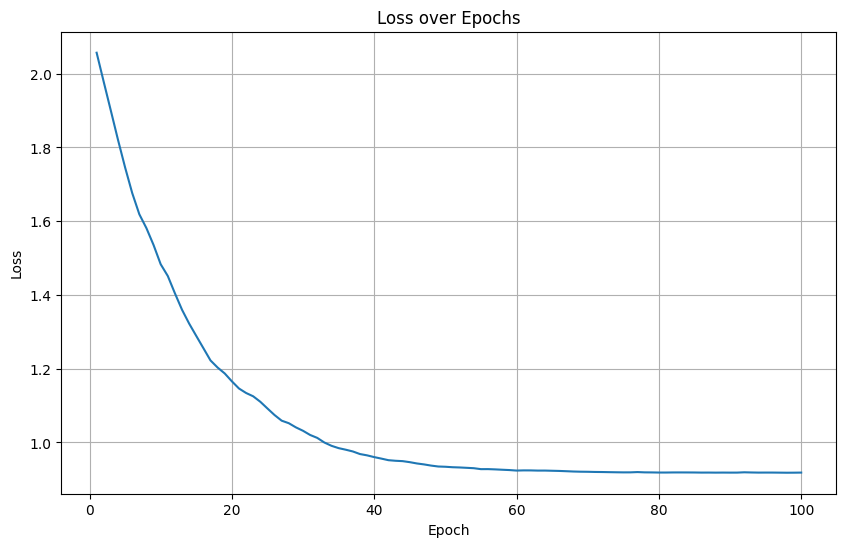

In [66]:
model.plot_loss()